# Trees

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import os
if not os.path.exists("images"): 
    os.mkdir("images")
pd.set_option('display.max_columns', None)
from scipy.stats import pointbiserialr, f_oneway
from scipy.stats import boxcox

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import Normalizer
import sklearn.ensemble

Background Info:
 - [Column Definitions](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
 - [Column Variables](https://www.kaggle.com/datasets/ahmedmohameddawoud/ames-housing-data)

Tasks:
 - <a href="#y">Y Variance (Histograms with Transformations)</a><br>
 - <a href="#f_var">Feature Variance (Histograms)</a><br>
 - <a href="#corr">Correlation Matrices</a><br>
 - <a href="#sp_corr">Feature / Salesprice Correlations</a><br>

In [119]:
housing_d = pd.read_csv('housing_cleaned.csv', index_col=0)

In [120]:
housing_d = housing_d.convert_dtypes()
housing_d = housing_d.reset_index().drop(columns = 'PID')
housing_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559 entries, 0 to 2558
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2559 non-null   Int64  
 1   SalePrice      2559 non-null   Int64  
 2   MSSubClass     2559 non-null   Int64  
 3   MSZoning       2559 non-null   string 
 4   LotFrontage    2559 non-null   Int64  
 5   LotArea        2559 non-null   Int64  
 6   Street         2559 non-null   string 
 7   LotShape       2559 non-null   string 
 8   LandContour    2559 non-null   string 
 9   Utilities      2559 non-null   string 
 10  LotConfig      2559 non-null   string 
 11  LandSlope      2559 non-null   string 
 12  Neighborhood   2559 non-null   string 
 13  Condition1     2559 non-null   string 
 14  Condition2     2559 non-null   string 
 15  BldgType       2559 non-null   string 
 16  HouseStyle     2559 non-null   string 
 17  OverallQual    2559 non-null   Int64  
 18  OverallC

In [121]:
continuous = ['SalePrice','GrLivArea','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath',
             'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
              'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
              'MiscVal','YrSold','OverallQual','OverallCond',]
print(len(continuous))
continuous_no_sp = ['GrLivArea','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath',
             'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
              'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
              'MiscVal','YrSold','OverallQual','OverallCond',]


continuous_wlog = ['SalePrice','GrLivArea','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath',
             'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
              'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
              'MiscVal','YrSold','SalesPrice_log','SalePrice_box','OverallQual','OverallCond',]
print(len(continuous_wlog))
categorical = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
              'Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
              'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
              'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
              'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
               'PoolQC','Fence','MiscFeature','MoSold','SaleType','SaleCondition']
print(len(categorical))
len(continuous_no_sp)

35
37
43


34

<p><a name="Y"></a></p>

#### Saturated Model, No Feature Engineering

In [187]:
from sklearn.preprocessing import LabelEncoder
housing_l = housing_d.copy()
for i in categorical:
    label_encoder_i = LabelEncoder()
    housing_l[i] = label_encoder_i.fit_transform(housing_l[i])
housing_l.head(2)

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MapRefNo,Prop_Addr,lat,long
0,856,126000,1,4,0,7890,1,3,3,0,0,0,19,2,2,0,2,6,6,1939,1950,1,0,13,14,2,0,3,4,1,5,5,4,5,238,6,0,618,856,1,4,1,3,856,0,0,1,0,1,0,2,1,4,4,6,1,5,1939,3,2,399,5,5,2,0,0,0,0,166,0,3,4,1,0,2,2010,9,4,909176150,436 HAYWARD AVE,42.018564,-93.651619
1,1049,139500,11,4,42,4235,1,3,3,0,4,0,7,2,2,4,2,5,5,1984,1984,1,0,6,6,1,149,2,4,1,2,5,2,2,552,0,393,104,1049,1,4,1,3,1049,0,0,1,0,2,0,2,1,2,5,6,0,1,1984,0,1,266,5,5,2,0,105,0,0,0,0,3,4,1,0,1,2009,9,4,905476230,3416 WEST ST,42.024855,-93.663671


<Figure size 640x480 with 0 Axes>

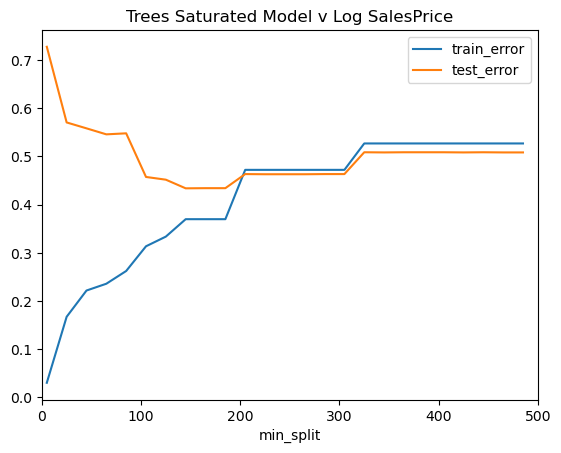

In [189]:
#Saturated Model
X = housing_l.drop(['SalePrice','MapRefNo','Prop_Addr','lat','long'], axis = 1)
y = np.log(housing_l['SalePrice']).round(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

#Saturated Tree Model
save_name = 'Sat_log'
title = 'Trees Saturated Model v Log SalesPrice'

errors = []
for i in range(5,500,20):
    tree_model = tree.DecisionTreeRegressor(min_samples_split=i)
    tree_model.fit(X_train, y_train)
    train_error = (1 - tree_model.score(X_train, y_train))
    test_error = (1 - tree_model.score(X_test, y_test))
    errors.append([i,train_error,test_error])
tree_scores = pd.DataFrame(errors, columns = ['min_split','train_error','test_error'])

plt.figure()
tree_scores.plot.line(x = 'min_split', y = ['train_error','test_error',], xlim = (0,500), title = title)
#plt.savefig('images/{}.png'.format(save_name))

In [190]:
tree_scores #best fit is 125

,min_split,train_error,test_error
0,5,0.030201,0.727336
1,25,0.167122,0.570347
2,45,0.221597,0.558102
3,65,0.235704,0.545646
4,85,0.262141,0.547771
5,105,0.313406,0.457244
6,125,0.333485,0.451590
7,145,0.369642,0.433651
8,165,0.369642,0.433992
9,185,0.369642,0.433992


In [193]:
#Saturated Model Features
tree_model = tree.DecisionTreeClassifier(min_samples_split=125)
tree_model.fit(X_train, y_train)
tree_model.score(X_test, y_test)
sat_tree_features = pd.DataFrame(tree_model.feature_importances_, index = X_train.columns)
sat_tree_features[sat_tree_features[0]>0].sort_values(by=0, ascending = False)

,0
OverallQual,0.584833
GrLivArea,0.144832
BsmtFinSF1,0.108662
TotalBsmtSF,0.092953
GarageArea,0.020998
LotArea,0.020371
1stFlrSF,0.010651
KitchenQual,0.007982
OverallCond,0.003034
SaleCondition,0.002007


<Figure size 640x480 with 0 Axes>

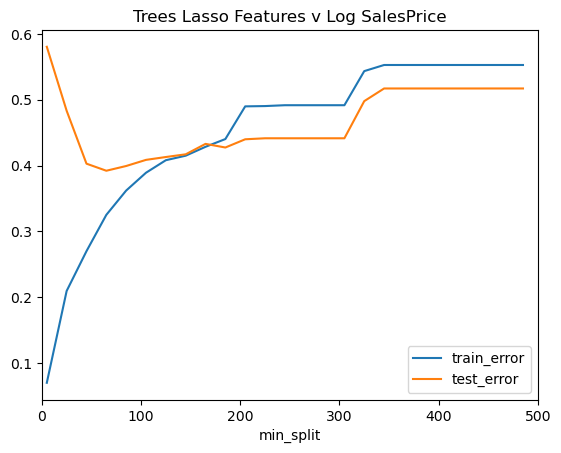

In [179]:
#Model using log and Lasso Features

errors1 = []
X1 = housing_d[['GrLivArea','OverallQual','YearBuilt','OverallCond','YearRemodAdd','BsmtFinSF2','BsmtUnfSF','Fireplaces','GarageYrBlt']]
y1 = np.log(housing_l['SalePrice']).round(0)
# Split the data into training and testing sets 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
X1_train.shape
# X_test
# y_train
for i in range(5,500,20):
    tree_model = tree.DecisionTreeRegressor(min_samples_split=i)
    tree_model.fit(X1_train, y1_train)
    train_error = (1 - tree_model.score(X1_train, y1_train))
    test_error = (1 - tree_model.score(X1_test, y1_test))
    errors1.append([i,train_error,test_error])
tree_scores1 = pd.DataFrame(errors1, columns = ['min_split','train_error','test_error'])
# tree_scores1.plot.line()
plt.figure()
tree_scores1.plot.line(x = 'min_split', y = ['train_error','test_error',], xlim = (0,500), title = 'Trees Lasso Features v Log SalesPrice')
plt.savefig('images/trees_lass.png')

In [128]:
tree_scores1 #min split = 145

,min_split,train_error,test_error
0,5,0.021495,0.121094
1,25,0.050318,0.126953
2,45,0.064973,0.117188
3,65,0.076209,0.103516
4,85,0.078652,0.103516
5,105,0.090376,0.125000
6,125,0.095261,0.121094
7,145,0.100635,0.099609
8,165,0.100635,0.099609
9,185,0.100635,0.099609


In [194]:
#Model using log and Lasso Features
tree_model = tree.DecisionTreeRegressor(min_samples_split=145)
tree_model.fit(X1_train, y1_train)
tree_model.score(X1_test, y1_test)
las_tree_features = pd.DataFrame(tree_model.feature_importances_, index = X1_train.columns)
las_tree_features[las_tree_features[0]>0].sort_values(by=0, ascending = False)

,0
OverallQual,0.685673
GrLivArea,0.258306
Fireplaces,0.026377
OverallCond,0.008543
GarageYrBlt,0.008453
YearBuilt,0.005690
YearRemodAdd,0.003846
BsmtUnfSF,0.003111


In [213]:
#Grid Search the Lasso Features

from sklearn.model_selection import GridSearchCV
grid_para_tree = [  # 2 DICTIONARIES TO BE FASTER
    {
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "min_samples_leaf": range(1, 10)},
    {
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}]
tree_model.set_params(random_state=108)
grid_search_tree = GridSearchCV(
    tree_model, grid_para_tree, cv=5, scoring='r2', n_jobs=-1) #should change the 

%time grid_search_tree.fit(X_train, y_train)

CPU times: user 1.75 s, sys: 336 ms, total: 2.08 s
Wall time: 41 s


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(min_samples_split=145,
                                             random_state=108),
             n_jobs=-1,
             param_grid=[{'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error', 'poisson'],
                          'min_samples_leaf': range(1, 10)},
                         {'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error', 'poisson'],
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}],
             scoring='r2')

In [214]:
## best parameters
grid_search_tree.best_params_

{'criterion': 'squared_error', 'min_samples_leaf': 1}

In [215]:
## best score
grid_search_tree.best_score_

0.5312392959480523

In [219]:
grid_search_tree.score(X_train, y_train)

0.6303579371645457

In [220]:
grid_search_tree.score(X_test, y_test)

0.5663488217682642

In [210]:
#Random Forest

from sklearn import ensemble
from sklearn.datasets import load_iris
randomForest = ensemble.RandomForestRegressor(oob_score = True)
bagging      = ensemble.BaggingRegressor()

randomForest.set_params(random_state=42, n_estimators=100, max_features=2)

RandomForestRegressor(max_features=2, oob_score=True, random_state=42)

In [223]:
randomForest.fit(X1_train, y1_train) # fit 
randomForest.score(X1_test, y1_test) # accuracy

# randomForest.fit(X_train, y_train) # fit 
# randomForest.score(X_test, y_test) # accuracy

0.6904940300512368

In [224]:
randomForest.oob_score_

0.6416545097657051

<Figure size 640x480 with 0 Axes>

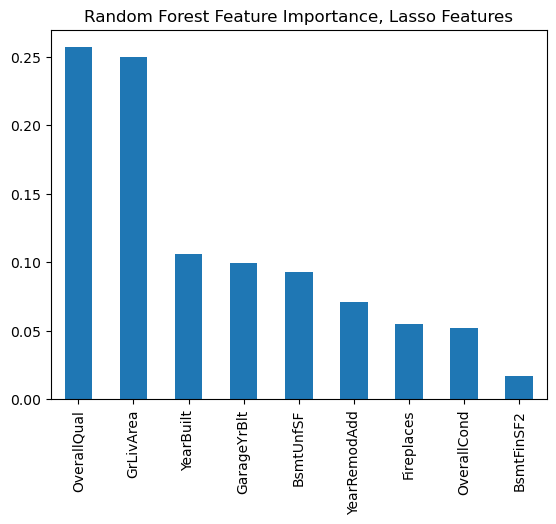

In [225]:
plt.figure()
pd.DataFrame(randomForest.feature_importances_, index = X1_train.columns).sort_values(
    by = 0, ascending = False).head(10).plot.bar(legend = False, title = 'Random Forest Feature Importance, Lasso Features')
plt.savefig('images/Forest_lass.png')

In [232]:
#ALT CODE FROM LECTURE
grid_para_forest = [{
        "n_estimators": [25, 50, 100],
        "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        "min_samples_leaf": range(1, 10)
    },
    {                
        "n_estimators": [25, 50, 100],
        "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
        #"random_state": [42]
    }]

grid_search_forest = GridSearchCV(
    randomForest.set_params(random_state = 42, warm_start = True), #move from grid to random forest
    grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X1_train, y1_train)

CPU times: user 4.95 s, sys: 437 ms, total: 5.39 s
Wall time: 2min 10s


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=2, oob_score=True,
                                             random_state=42, warm_start=True),
             n_jobs=-1,
             param_grid=[{'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error', 'poisson'],
                          'min_samples_leaf': range(1, 10),
                          'n_estimators': [25, 50, 100]},
                         {'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error', 'poisson'],
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
                          'n_estimators': [25, 50, 100]}],
             scoring='r2')

In [233]:
grid_search_forest.best_params_

{'criterion': 'friedman_mse', 'min_samples_split': 8, 'n_estimators': 50}

In [234]:
grid_search_forest.best_score_

0.6355669758250979

#### Boosting

In [235]:
X2 = housing_l.drop(['SalePrice','MapRefNo','Prop_Addr','lat','long'], axis = 1)
y2 = housing_l['SalePrice']
data = train_test_split(X2, y2, test_size=0.2, random_state=1)
data[2]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

975     191000
965     148000
588     122000
242     342000
370     120000
         ...  
960     115500
905     180000
1096    139500
235     220000
1061    196000
Name: SalePrice, Length: 2047, dtype: Int64

In [250]:
def tune_gbm(learning_rate, max_depth):
    gbm = ensemble.GradientBoostingRegressor(
        learning_rate=learning_rate, n_estimators=10000, min_samples_split = 10, max_depth=max_depth)
    gbm.fit(data[0],data[2])
    
    return gbm


def demo_gbm_tuning(model, start=0, end=10000, training_curve=True):
    gen_train = model.staged_predict(data[0])
    gen_test  = model.staged_predict(data[1])

    trainMSE = []
    testMSE  = []
    steps   = range(1,10001)
    for n in steps:
        y_pred_train = next(gen_train)
        y_pred_test  = next(gen_test)
        trainMSE.append(mean_squared_error(y_pred_train, data[2]))
        testMSE.append(mean_squared_error(y_pred_test, data[3]))
    y_pred = model.predict(data[1])
    r2 = r2_score(data[3], y_pred)
    mae = np.mean(np.abs(y_pred_test - data[3]))

    print("The best test score is {:.2f} at the step {}".format(
        min(testMSE), np.argmin(testMSE)+1))
    print("The best test score is {:.2f} at the step {}".format(
        min(testMSE), np.argmin(testMSE)+1))
    print("The R squared is {:.4f}.".format(r2))
    print("The MAE is {:.2f}.".format(mae))
    print('-'*50)
    plt.plot(range(start, end), testMSE[start:end])
    if training_curve:
        plt.plot(range(start, end), trainMSE[start:end])
    plt.legend()
    return model.feature_importances_, model.feature_names_in_, model.n_features_in_, model.train_score_, model.oob_scores_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The best test score is 483140756.96 at the step 10000
The best test score is 483140756.96 at the step 10000
The R squared is 0.9243.
The MAE is 14163.16.
--------------------------------------------------


AttributeError: 'GradientBoostingRegressor' object has no attribute 'oob_scores_'

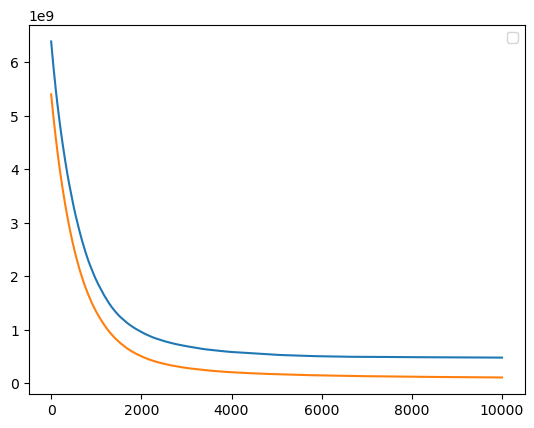

In [251]:
#Saturated Model
data = train_test_split(X2, y2, test_size=0.2, random_state=1)
learning_rate=0.001
max_depth=4

model1 = tune_gbm(learning_rate, max_depth)

start = 0
end = 10000 # You may change start and end to zoom in
demo_gbm_tuning(model1, start=0, end=10000, training_curve=True)

In [246]:
sec_boost = []
for i in sorted(zip(model1.feature_importances_, X_train.columns),key=lambda t:t[0], reverse=True)[0:50]:
    sec_boost.append(i[1])
sec_boost

['OverallQual',
 'GrLivArea',
 'BsmtFinSF1',
 'YearBuilt',
 'TotalBsmtSF',
 '1stFlrSF',
 'GarageArea',
 'GarageCars',
 'LotArea',
 '2ndFlrSF',
 'Fireplaces',
 'KitchenQual',
 'BsmtQual',
 'YearRemodAdd',
 'OverallCond',
 'GarageType',
 'ExterQual',
 'GarageYrBlt',
 'Neighborhood',
 'TotRmsAbvGrd',
 'MSZoning',
 'MasVnrArea',
 'BsmtFinType1',
 'BsmtExposure',
 'OpenPorchSF',
 'BsmtFullBath',
 'SaleCondition',
 'LotFrontage',
 'CentralAir',
 'ScreenPorch',
 'HeatingQC',
 'MoSold',
 'Condition1',
 'WoodDeckSF',
 'LandContour',
 'BsmtFinSF2',
 'Functional',
 'BsmtUnfSF',
 'HalfBath',
 'MSSubClass',
 'Condition2',
 'GarageQual',
 'FullBath',
 'EnclosedPorch',
 'Exterior1st',
 'RoofMatl',
 'LandSlope',
 'BedroomAbvGr',
 'GarageFinish',
 'BsmtHalfBath']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The best test score is 2596261306.26 at the step 459
The R squared is 0.7192.
The MAE is 22575.20.
--------------------------------------------------


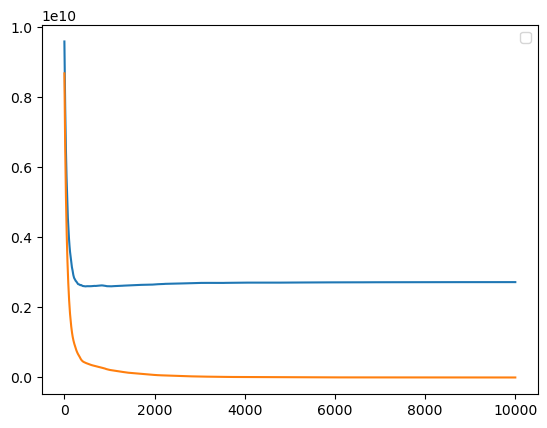

In [239]:
#Top ten from Sat model - not sure what it is
data = train_test_split(housing_d[sec_boost], np.exp(y1), test_size=0.2, random_state=1)
data[0]
learning_rate=0.01
max_depth=6

model2 = tune_gbm(learning_rate, max_depth)

start = 0
end = 10000 # You may change start and end to zoom in

demo_gbm_tuning(model2, start, end)  #underfitting bc we have not seen the test increase. we have not hit a minimum

The best test score is 2991916540.18 at the step 9928
The R squared is 0.6909.
The MAE is 26233.89.
--------------------------------------------------


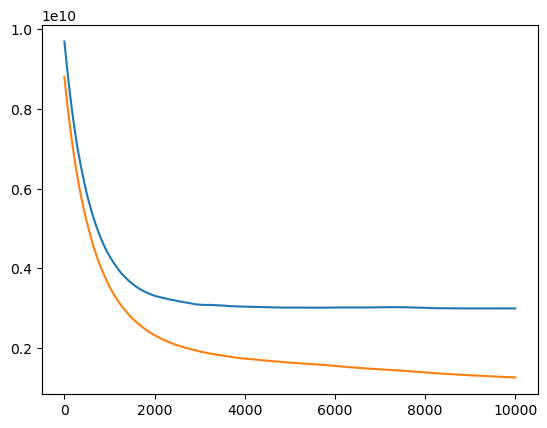

In [152]:
#Lasso Features Model
data = train_test_split(X1, np.exp(y1), test_size=0.2, random_state=1)
data[0]
learning_rate=0.001
max_depth=4

model2 = tune_gbm(learning_rate, max_depth)

start = 0
end = 10000 # You may change start and end to zoom in

demo_gbm_tuning(model2, start, end)  #underfitting bc we have not seen the test increase. we have not hit a minimum

In [240]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize and run Grid Search
grid_search = GridSearchCV(estimator=ensemble.GradientBoostingRegressor(), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X2_train, y2_train)

# # Print best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [241]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [245]:
grid_search_forest.best_score_

0.6355669758250979

In [153]:
sorted(zip(model2.feature_importances_, X1_train.columns),key=lambda t:t[0], reverse=True)

[(0.5409585868639495, 'OverallQual'),
 (0.2541820164063725, 'GrLivArea'),
 (0.06005290586567678, 'BsmtUnfSF'),
 (0.02925182179447603, 'Fireplaces'),
 (0.02853873105209017, 'YearBuilt'),
 (0.028490932868170418, 'YearRemodAdd'),
 (0.02488934043371708, 'OverallCond'),
 (0.017769250342925244, 'BsmtFinSF2'),
 (0.015866414372622293, 'GarageYrBlt')]

Highest adjusted r squared for this line fo inquiry - MLS, selection by coefficients. 
['OverallCond',
 'OverallQual',
 'Fireplaces',
 'GarageCars',
 'FullBath',
 'YearBuilt',
 'LotFrontage']. All are continuous, which asks whether I have explored the categorical enough. 